# Report on sales data of a company that sells motorcycle parts

The company operates three warehouses in a large metropolitan area. In this report, I tried to analyze past sales data to answer unique business questions in order to obtain actionable insights going forward. 

In [1]:
# Importing the pandas module
import pandas as pd

# Reading in the sales data
df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])

# Take a look at the first datapoints
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [2]:
# To review the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [3]:
# Question 1: What are the total sales for each payment method?

# To get the total sales for each payment method, we use the groupby() method as below. 

total_sales_payment_method = df.groupby('payment')[['total']].sum()
total_sales_payment_method

,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


In [4]:
# Question 2: What is the average unit price for each product line?

avg_unit_price_product_line = df.groupby('product_line')[['unit_price']].mean()
avg_unit_price_product_line

,unit_price
product_line,
Breaking system,17.740522
Electrical system,25.585130
Engine,60.091803
Frame & body,42.832229
Miscellaneous,22.810738
Suspension & traction,33.969868


Text(0, 0.5, 'Total sales')

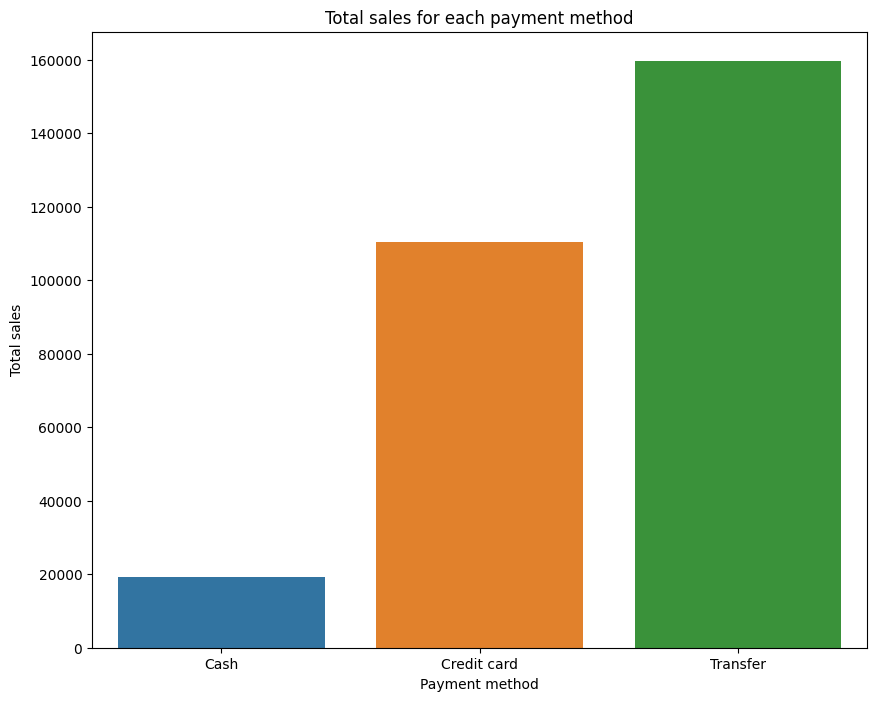

In [5]:
# Question 3: Create plots to visualize findings for questions 1 and 2.
# To visualize the findings in question 1 and 2, we are going to firstly import libraries for visualization 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (10, 8))
sns.barplot(x = total_sales_payment_method.index, y = total_sales_payment_method["total"])
plt.title('Total sales for each payment method')
plt.xlabel('Payment method')
plt.ylabel('Total sales')


Text(0, 0.5, 'unit price')

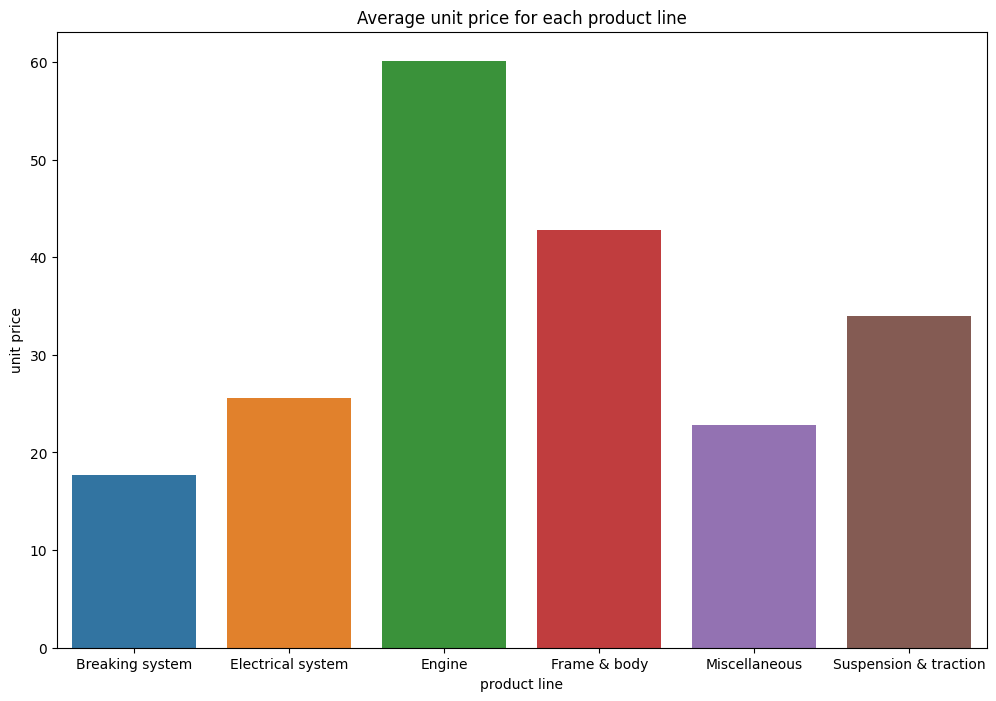

In [6]:
# visualization for question 2

plt.figure(figsize = (12, 8))
sns.barplot(x = avg_unit_price_product_line.index, y = avg_unit_price_product_line["unit_price"])
plt.title('Average unit price for each product line')
plt.xlabel('product line')
plt.ylabel('unit price')


In [7]:
# Question 4: Investigate average purchase value by client type

avg_purchase_value_client_type = df.groupby('client_type')[['unit_price']].mean()
avg_purchase_value_client_type

,unit_price
client_type,
Retail,30.286852
Wholesale,30.443244


Text(0, 0.5, 'unit price')

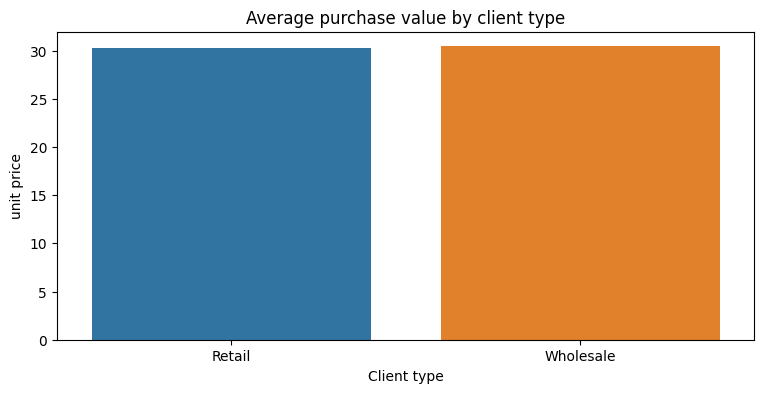

In [8]:
plt.figure(figsize = (9, 4))
sns.barplot(x = avg_purchase_value_client_type.index, y = avg_purchase_value_client_type["unit_price"])
plt.title('Average purchase value by client type')
plt.xlabel('Client type')
plt.ylabel('unit price')

In [9]:
# Question 5: Investigate total purchase value by product line

total_purchase_value_product_line = df.groupby('product_line')[['total']].sum()
total_purchase_value_product_line

,total
product_line,
Breaking system,38350.15
Electrical system,43612.71
Engine,37945.38
Frame & body,69024.73
Miscellaneous,27165.82
Suspension & traction,73014.21


Text(0, 0.5, 'total')

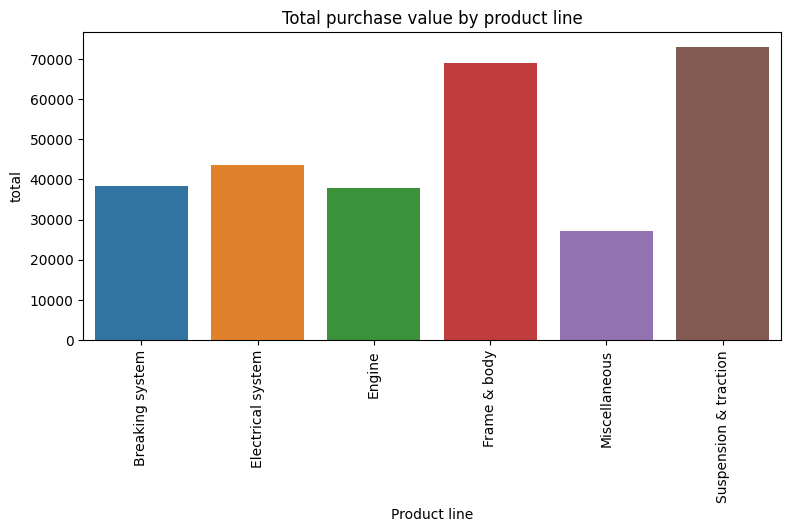

In [10]:
plt.figure(figsize = (9, 4))
p = sns.barplot(x = total_purchase_value_product_line.index, y = total_purchase_value_product_line["total"])
p.set_xticklabels(p.get_xticklabels(), rotation = 90)
plt.title('Total purchase value by product line')
plt.xlabel('Product line')
plt.ylabel('total')

In [11]:
# Question 7:  What are the total quantity sold for each product line?

total_quantity_product_line = df.groupby('product_line')[['quantity']].sum()
total_quantity_product_line

,quantity
product_line,
Breaking system,2130
Electrical system,1698
Engine,627
Frame & body,1619
Miscellaneous,1176
Suspension & traction,2145


Text(0, 0.5, 'quantity')

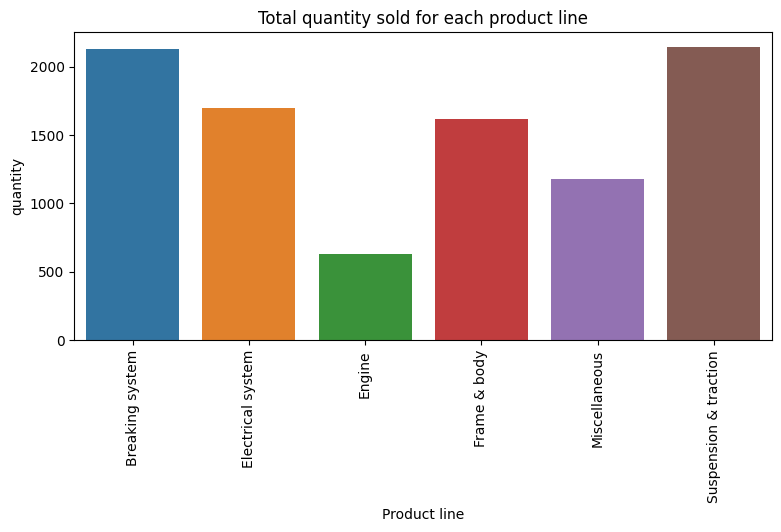

In [12]:
plt.figure(figsize = (9, 4))
p = sns.barplot(x = total_quantity_product_line.index, y = total_quantity_product_line["quantity"])
p.set_xticklabels(p.get_xticklabels(), rotation = 90)
plt.title('Total quantity sold for each product line')
plt.xlabel('Product line')
plt.ylabel('quantity')

In [13]:
# Question 8: Investigate total quantity of motorcycle parts purchased by each client type

total_quantity_client_type = df.groupby('client_type')[['quantity']].sum()
total_quantity_client_type

,quantity
client_type,
Retail,4215
Wholesale,5180


Text(0, 0.5, 'Quantity')

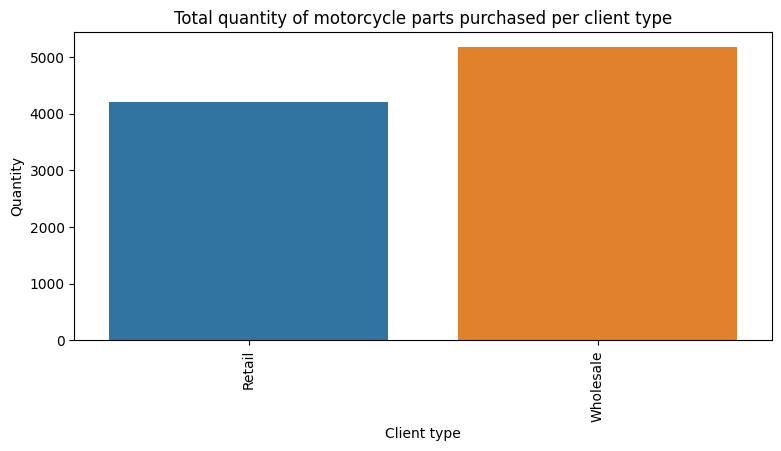

In [14]:
plt.figure(figsize = (9, 4))
p = sns.barplot(x = total_quantity_client_type.index, y = total_quantity_client_type["quantity"])
p.set_xticklabels(p.get_xticklabels(), rotation = 90)
plt.title('Total quantity of motorcycle parts purchased per client type')
plt.xlabel('Client type')
plt.ylabel('Quantity')

In [15]:
# Question 9: Investigate total sales by each client type

total_per_client_type = df.groupby('client_type')[['total']].sum()
total_per_client_type

,total
client_type,
Retail,129470.67
Wholesale,159642.33


Text(0, 0.5, 'Total')

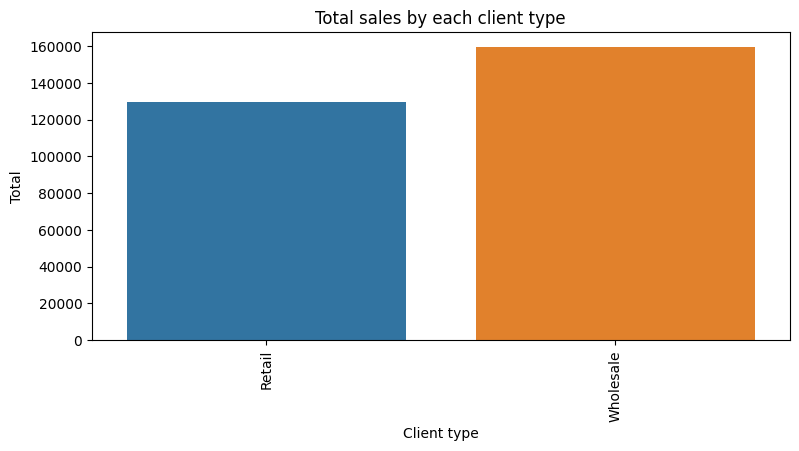

In [16]:
plt.figure(figsize = (9, 4))
p = sns.barplot(x = total_per_client_type.index, y = total_per_client_type["total"])
p.set_xticklabels(p.get_xticklabels(), rotation = 90)
plt.title('Total sales by each client type')
plt.xlabel('Client type')
plt.ylabel('Total')

# Summary of my findings.
- From the sales analysis, the highest total sales was made through the "transfer payment method" followed by "credit card" and "cash payment" being the least used payment method
- In terms of unit price, "engine" had the highest while "breaking system" had the lowest
- "Suspension & traction" had the highest purchase value followed by "frame and body" and the least is "miscellaneous"
- In terms of quantity sold, "Suspension & traction" was sold the most followed by "breaking system" while "engine" with the highest unit price was sold the least.
- Wholesalers made the highest purchase in terms of quantity and total sales 